In [56]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import scipy as sp
from MySimpson import MySimpson
from Newtonsys import Newtonsys

# Part A

## A) 4

## B) 3

## C) 4

## D) 3

## E) 1

## F) 4

# Part B

# Question 1

## 1.1)

In [24]:
f = lambda x: np.exp(1-x**2)
a = 0
b = 1
n = 500
S_true = MySimpson(f, a, b, n) #f,a,b,n
S_true

np.float64(2.0300784692790597)

In [26]:
N = [20, 40, 60, 80, 100]
e = []
for n in N:
    S = MySimpson(f, a, b, n)
    dS = np.abs(S-S_true)
    e.append(dS)
e

[np.float64(1.388045967054552e-07),
 np.float64(8.67890337374888e-09),
 np.float64(1.7142087749277835e-09),
 np.float64(5.421605386857209e-10),
 np.float64(2.2186297243820263e-10)]

In [28]:
e = np.array([1.39*10**(-7), 8.68*10**(-9), 1.71*10**(-9), 5.42*10**(-10), 5.22*10**(-10)])
e

array([1.39e-07, 8.68e-09, 1.71e-09, 5.42e-10, 5.22e-10])

In [40]:
err_table = np.array([N, e])
err_table

array([[2.00e+01, 4.00e+01, 6.00e+01, 8.00e+01, 1.00e+02],
       [1.39e-07, 8.68e-09, 1.71e-09, 5.42e-10, 5.22e-10]])

## 1.2,3,4)

The normal equation can be written like $(A^TA)c=A^Ty$

In [48]:
A = np.array([np.ones(5), -np.log(N)]).T #System matrix
y = np.log(e)                            #right hand side
A, y

(array([[ 1.        , -2.99573227],
        [ 1.        , -3.68887945],
        [ 1.        , -4.09434456],
        [ 1.        , -4.38202663],
        [ 1.        , -4.60517019]]),
 array([-15.7887919 , -18.56224431, -20.18677247, -21.33575511,
        -21.37335353]))

In [49]:
c = np.linalg.solve(A.T@A,A.T@y)  #solution for beta and alpha

In [51]:
print("beta =", c[0])
print("alpha =", c[1])

beta = -4.995061596805749
alpha = 3.656331554896546


\begin{equation}
    log(e_n)\approx -5.00 - 3.65 \cdot log(n)
\end{equation}

# Question 2

\begin{equation}
\mathbf{F(X)} = \begin{bmatrix} -x^2 - x +2y - 18 \\ (x-1)^2 + (y-6)^2 - 25 \end{bmatrix} = \mathbf{0}
\end{equation}
\begin{equation}
\mathbf{F^{'}(X)} = \begin{bmatrix} -2x -1 && 2 \\ 2x-2 && 2y-12 \end{bmatrix}
\end{equation}

In [55]:
def FdF(xy):
    x, y = xy
    F = np.array([-x**2 - x + 2*y - 18, (x-1)**2 + (y-6)**2 - 25])
    dF = np.array([[-2*x-1,2],[2*x-2, 2*y - 12]])
    return F, dF

## 2.2) 
I would choose points near the actual solution because Newton's method is sensitive to how close to the real solution you choose the starting point. We can see that the system has 2 solution at the points approximately $[-2,10]$ and $[1.5,11]$. So any point near those two is a good guess for the starting point. 

## 2.3)

In [57]:
x1 = [-1.7,10.5]
x2 = [1.6, 10]
X1 = Newtonsys(FdF,x1,50)
X2 = Newtonsys(FdF,x2,50)
display(X1[-1], X2[-1])

array([-2., 10.])

array([ 1.54694647, 10.96999493])

I run 50 iterations with the starting points $[-1.7,10.5]$ and $[1.6, 10]$ with the results $[-2., 10.]$ and $[ 1.547, 10.97]$. The result is consistent with what we see on the graph.

# Question 3
## 3.1)

\begin{gather}
P_k(x_i) = y_i \Rightarrow P(x) = p_k + c(x-x_0)(x-x_1)...(x-x_k)
\end{gather}
$P(x)$ is of degree at most $k+1$, $c$ can be determined by
\begin{gather}
P(x_{k+1}) = p_k(x_{k+1}) + c(x_{k+1}-x_0)(x_{k+1}-x_1)...(x_{k+1}-x_k)
\end{gather}

\begin{gather}
p_0(x) = y_0 = 1\\
p_1(x) = p_0(x) + c(x - 0) = 1 + cx \Rightarrow p_1(0.05) = 1 + c \cdot 0.05 = 1.105 \Rightarrow c = 2.1\\
p_2(x) = p_1(x) + c(x-0)(x-0.05) = 1 + 2.1(x-0) + c(x-0)(x-0.05 \Rightarrow \\
p_2(0.1) = 1 + 2.1(0.1) + c(0.1)(0.1 - 0.05) = 1.221 \Rightarrow c = 2.2 \\
p_2(x) = 1 + 2.1(x-0) + 2.2(x-0)(x-0.05)
\end{gather}
Nested form
\begin{equation}
p(x) = 1 + (x-0)(2.1 + 2.2(x-0.05))
\end{equation}

## 3.2)

\begin{equation}
|f(x) - p(x)| \leq \frac{1}{4(n+1)}Mh^{n+1}, \, \, |f^{(n+1)}(x) \leq M|
\end{equation}
\begin{equation}
f^{(n+1)}(x) = 2^{n+1}e^{2x}
\end{equation}
On the interval I the largest value this derivative can take is at the point $x = 0.1$.
\begin{equation}
f^{(n+1)}(0.1) = 2^{n+1}e^{0.2}
\end{equation}
Now we can substitute it in the error inequality with $h = \frac{0.1}{n}$
\begin{equation}
|f(x) - p(x)| \leq \frac{1}{4(n+1)} 2^{n+1}e^{0.2} (\frac{0.1}{n})^{n+1} \leq 10^{-5} 
\end{equation}
\begin{gather}
\frac{1}{4(n+1)} e^{0.2} (\frac{0.2}{n})^{n+1} \leq 10^{-5}
\end{gather}

I will use sympy to find derivative and use it in newton algorithm to find n

In [63]:
from sympy import *
n = symbols('n') 
diff(exp(0.2)/4/(n+1)*(0.2/n)**(n+1))

0.305350689540042*(0.2/n)**(n + 1)*(log(0.2/n) - 1.0*(n + 1)/n)/(n + 1) - 0.305350689540042*(0.2/n)**(n + 1)/(n + 1)**2

In [64]:
f = lambda n: np.exp(0.2)/4/(n+1)*(0.2/n)**(n+1) - 10**(-5)
df = lambda n: np.exp(0.2)/4*(0.2/n)**(n+1)/(n+1)*(np.log(0.2/n) - (n+1)/n) - np.exp(0.2)/4/(n+1)**2*(0.2/n)**(n+1)

In [65]:
def newton(f, df, x0, nmax):
    x = x0
    iterates = [x0]
    for n in range(nmax):
        x = x - f(x)/df(x)
        iterates.append(x)
    return iterates

In [76]:
n = newton(f, df, 2, 100)
n[-1]

np.float64(2.5554617321607407)

Check if it is the correct result 

In [77]:
f(3), f(2)

(np.float64(-8.492095360296087e-06), np.float64(9.178356318001418e-05))

### The smallest n is 3.

# Question 4

## 4.1)

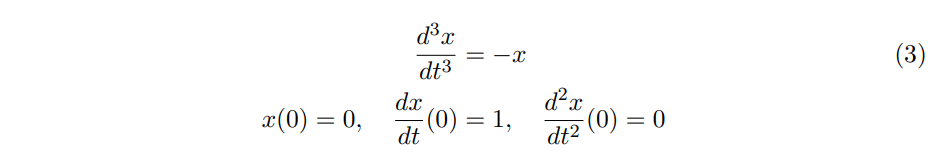

\begin{gather}
x = z_1\\
x^{'} = z_1^{'} = z_2\\
x^{''} = z_2^{'} = z_3\\
x^{'''} = z_3^{'}
\end{gather}
\begin{equation}
\begin{bmatrix} z_1^{'}\\ z_2^{'} \\ z_3^{'}\end{bmatrix} = \begin{bmatrix} z_2 \\ z_3 \\ -z_1\end{bmatrix}
\end{equation}

In [106]:
def sys(_,z):
    #z[0] = x
    #z[1] = dx/dt
    #z[2] = dx^2/d^2t
    
    M = np.array([z[1], z[2], -z[0]])
    return M

In [107]:
def MyRK4System(sys, tspan, x0, n):
    if x0.shape[0] != sys(tspan[0],x0).shape[0]:
        print("Wrong dimensions of x0 and system")
        return
    t = tspan[0]
    h = (tspan[1] - tspan[0])/n
    x = x0
    t_vec = []
    MX = []
    MX.append(x)
    t_vec.append(t)
    for i in range(1,n+1):
        K1 = h*sys(t, x)
        K2 = h*sys(t + 0.5*h, x + 0.5*K1)
        K3 = h*sys(t + 0.5*h, x + 0.5*K2)
        K4 = h*sys(t + h, x + K3)
        x = x + 1/6*(K1+2*K2+2*K3+K4)
        t = tspan[0] + i*h
        MX.append(x)
        t_vec.append(t)
    return t_vec, MX

## 4.2)

In [108]:
x0 = np.array([0,1,0]) #given
tspan = [0,4] #interval
h1 = 0.5
h2 = 0.25

#number of points(number of function evaluations) is I//h + 1, where I is the interval finish-start, we have finish = 4 and start = 0
#number of steps is I//h 

I = tspan[1] - tspan[0]
n1 = int(I//h1 + 1) #number of points for k1
n2 = int(I//h2 + 1) #number of points for k2

In [109]:
X1 = MyRK4System(sys,tspan,x0,n1)
X2 = MyRK4System(sys,tspan,x0,n2)

In [110]:
x_n1 = X1[1][-1][0] #x at t=4 for k = 2
x_n2 = X2[1][-1][0] #x at t=4 for k = 2
x_n1, x_n2

(np.float64(-3.6969107800702625), np.float64(-3.6944243176387186))

In [111]:
print("x(4) at t = 4 for k = 1 is", x_n1)
print("x(4) at t = 4 for k = 2 is", x_n2)

x(4) at t = 4 for k = 1 is -3.6969107800702625
x(4) at t = 4 for k = 2 is -3.6944243176387186
